In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len (words)

32033

In [5]:
max (len (w) for w in words)

15

In [6]:
min(len(w)for w in words)

2

In [7]:
for w in words[:1]:
    for ch1,ch2 in zip(w,w[1:]):
        print (ch1, ch2)

e m
m m
m a


In [8]:
b={}
for w in words:
    chs = ['<S>'] + list(w) +['<E>']
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram = (ch1,ch2)
        b[bigram]= b.get(bigram, 0)+1

In [9]:
sorted(b.items(), key=lambda x:-x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [10]:
import torch

In [11]:
a = torch.zeros((27,28), dtype= torch.int32)           

In [12]:
chars= sorted(list(set(''.join(words))))
stoi= {s:i+1 for i,s in enumerate (chars)}
stoi['.']= 0
itos = {i:s for s,i in stoi.items()}


In [13]:
for w in words:
    chs = ['.'] + list(w) +['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        a[ix1,ix2]+=1

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

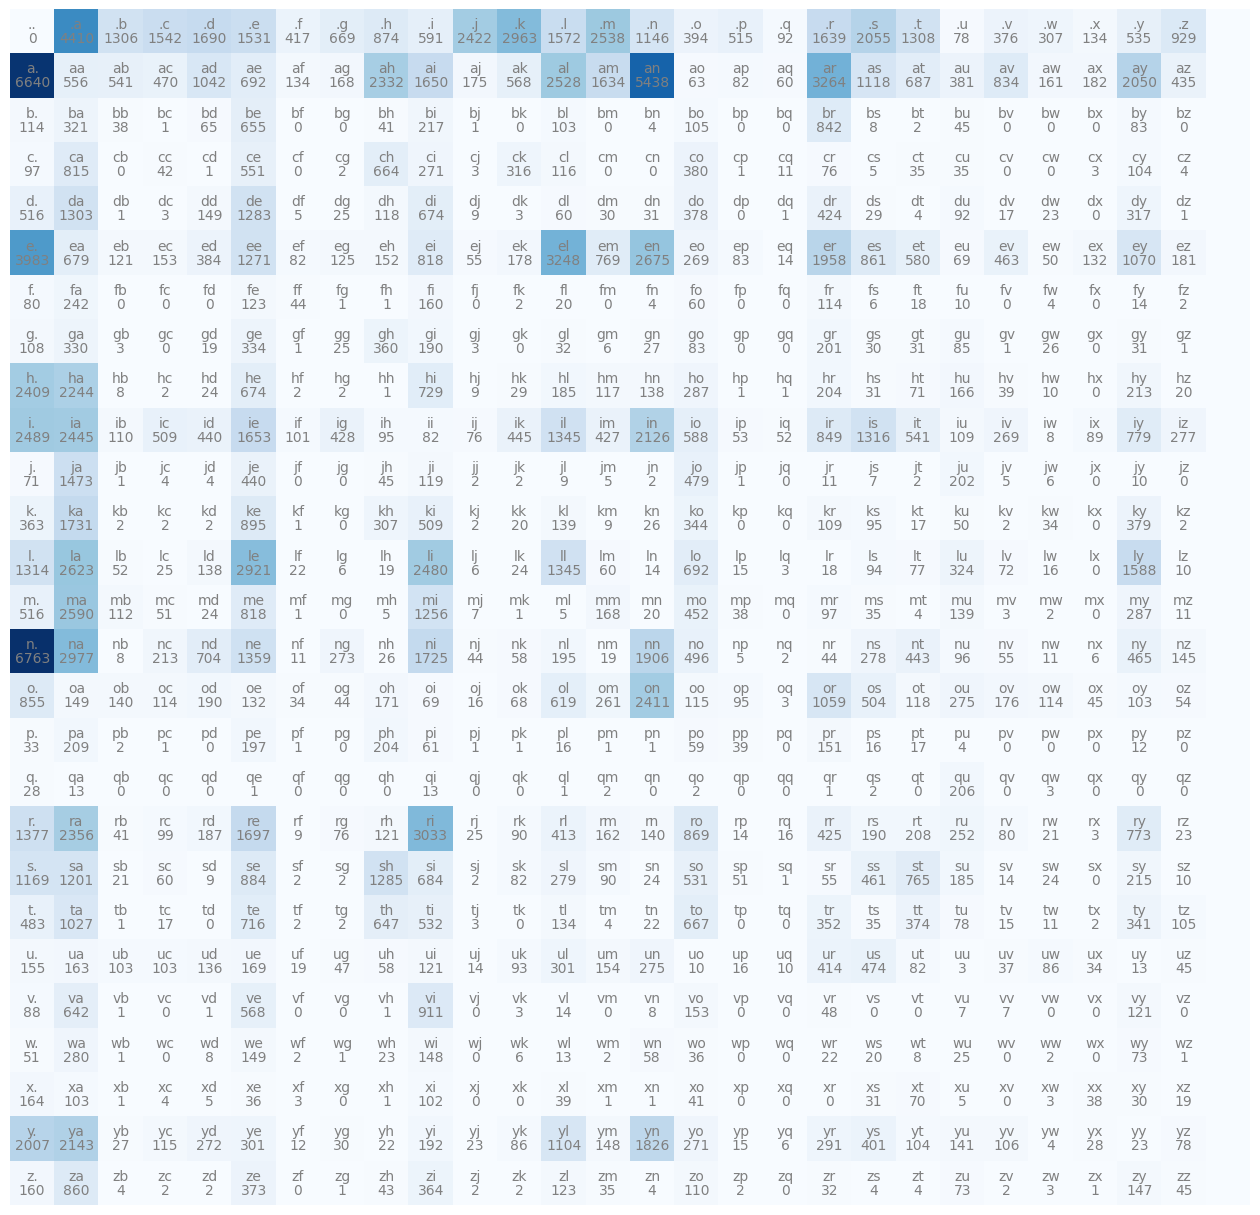

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(a, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, a[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


In [16]:
a[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [17]:
p= a[0].float()
p= p/p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [18]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [19]:
g=torch.Generator().manual_seed(2147483647)
p= torch.rand(3, generator= g)
p= p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [20]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [21]:
import torch
weights = torch.tensor([0.7, 0.3])
g = torch.Generator().manual_seed(42)
results = torch.multinomial(weights, num_samples=10000, replacement=True, generator=g)
counts = results.bincount()
print(f"Index 0 won: {counts[0]} times")
print(f"Index 1 won: {counts[1]} times")

Index 0 won: 6971 times
Index 1 won: 3029 times


In [74]:
P=(a+1).float()
P/=P.sum(1, keepdim= True)


In [242]:
g=torch.Generator().manual_seed(2147483647)

for i in range(10):
    out= []
    ix = 0 
    while True:
        p=P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cava.
ayamaijowy.
aianeta.
rl.
miryndardyrioma.
kiinninaswila.
en.
ahlanyanlen.
tav.
sissth.


In [76]:
print (f'{P.shape}')

torch.Size([27, 28])


In [77]:
ll=0.                             #log_likelihood
n=0                               #count for normalization

for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P[ix1, ix2]
        logprob= torch.log(prob)
        ll+=logprob
        n+=1
        print (f'{ch1}{ch2}: {prob:.4f}:"{logprob:.4f}') 
print(f'{ll}')
nll = - ll
print(f'{nll}')
print(f'{nll/n}')
    

.e: 0.0478:"-3.0411
em: 0.0377:"-3.2794
mm: 0.0253:"-3.6755
ma: 0.3885:"-0.9456
a.: 0.1958:"-1.6305
.o: 0.0123:"-4.3965
ol: 0.0779:"-2.5527
li: 0.1774:"-1.7294
iv: 0.0152:"-4.1845
vi: 0.3506:"-1.0480
ia: 0.1380:"-1.9807
a.: 0.1958:"-1.6305
.a: 0.1376:"-1.9835
av: 0.0246:"-3.7041
va: 0.2472:"-1.3975
a.: 0.1958:"-1.6305
-38.810203552246094
38.810203552246094
2.425637722015381


In [78]:
ll=0.                             #log_likelihood
n=0                               #count for normalization

for w in words:
#for w in ["mohamed"]:
    chs = ['.'] + list(w) + ['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob = P[ix1, ix2]
        logprob= torch.log(prob)
        ll+=logprob
        n+=1
        #print (f'{ch1}{ch2}: {prob:.4f}:"{logprob:.4f}') 
print(f'{ll}')
nll = - ll
print(f'{nll}')
print(f'{nll/n}')

-559978.75
559978.75
2.4544754028320312


In [ ]:
#neural network approach

In [80]:
xs , ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        print (ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
xs= torch.tensor(xs)
ys= torch.tensor(ys)

. e
e m
m m
m a
a .


In [81]:
xs

tensor([ 0,  5, 13, 13,  1])

In [82]:
ys

tensor([ 5, 13, 13,  1,  0])

In [155]:
import torch.nn.functional as F

In [156]:
g=torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator= g, requires_grad=True)

In [157]:
xenc = F.one_hot(xs,num_classes = 27).float()
logits = xenc @ W #logcounts
counts = logits.exp()  #this is equal to the a matrix 
probs = counts/counts.sum(1, keepdim=True)

In [158]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())
                


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286250479519367
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
       grad_fn=<SelectBackward0>)
label (actual next characte

In [163]:
loss= -probs[torch.arange(5), ys].log().mean()
print(loss)

tensor(3.7693, grad_fn=<NegBackward0>)


In [161]:
print (W.grad.shape)

torch.Size([27, 27])


In [162]:
W.data+= -50 * W.grad

In [165]:
g=torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator= g, requires_grad=True)

In [174]:
xenc = F.one_hot(xs,num_classes = 27).float()
logits = xenc @ W #logcounts
counts = logits.exp()  #this is equal to the a matrix 
probs = counts/counts.sum(1, keepdim=True)
loss= -probs[torch.arange(5), ys].log().mean()
loss.item()

3.7291626930236816

In [172]:
W.grad=None
loss.backward()

In [173]:
W.data += -0.1 * W.grad

In [175]:
#------------optimization loop for the whole dataset----------------------------------

In [266]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [272]:
for k in range (1):
    xenc = F.one_hot(xs,num_classes = 27).float()
    logits = xenc @ W #logcounts
    counts = logits.exp()  #this is equal to the a matrix 
    probs = counts/counts.sum(1, keepdim=True)
    loss= -probs[torch.arange(num), ys].log().mean()+ 0.01*(W**2).mean()
# backprop
    W.grad=None
    loss.backward()
    #update
    W.data += -80 * W.grad

In [275]:
g = torch.Generator().manual_seed(2147483647)

for i in range(25):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        p = F.softmax(logits, dim=1)

        ix = torch.multinomial(p[0], 1, generator=g).item()
        out.append(itos[ix])

        if ix == 0:
            break

    print(''.join(out))

cexze.
momanurailezityharellimittain.
llayn.
kan.
a.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
kalemimmsade.
enkaviyny.
ftlspehinivenvtahlasu.
dsor.
br.
jol.
pen.
aisan.
jar.
dinee.
zem.
deru.
firit.
gaikajahahbevare.
kiysthelenaririenah.
keen.


Initialized empty Git repository in /Users/mohamedawadalla/notebooks/Makemore/.git/
